<a href="https://colab.research.google.com/github/ayshabincy/Face-Mask-Detection/blob/main/DL_facemask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
81/81 [==============================] - 98s 1s/step - loss: 0.4445 - accuracy: 0.7976 - val_loss: 0.3458 - val_accuracy: 0.8419
Epoch 2/10
81/81 [==============================] - 98s 1s/step - loss: 0.2768 - accuracy: 0.8837 - val_loss: 0.2654 - val_accuracy: 0.8884
Epoch 3/10
81/81 [==============================] - 101s 1s/step - loss: 0.2203 - accuracy: 0.9085 - val_loss: 0.2587 - val_accuracy: 0.8853
Epoch 4/10
81/81 [==============================] - 100s 1s/step - loss: 0.2006 - accuracy: 0.9217 - val_loss: 0.2413 - val_accuracy: 0.8977
Epoch 5/10
81/81 [==============================] - 101s 1s/step - loss: 0.1435 - accuracy: 0.9484 - val_loss: 0.2338 - val_accuracy: 0.9147
Epoch 6/10
81/81 [==============================] - 96s 1s/step - loss: 0.1125 - accuracy: 0.9585 - val_loss: 0.3056 - val_accuracy: 0.8899
Epoch 7/10
81/81 [==============================] - 96s 1s/step - loss: 0.0856 - accuracy: 0.9698 - val_loss: 0.2837 - val_accuracy: 0.9132
Epoch 8/10
81/81 

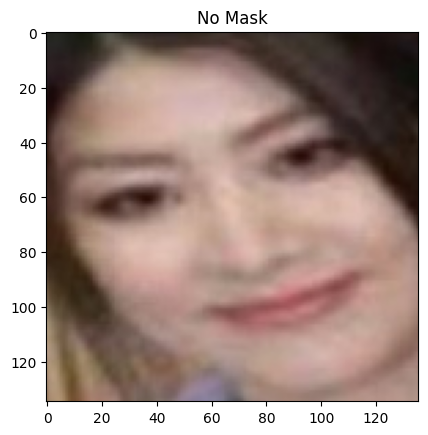

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers

# Function to load and preprocess images
def load_images(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 128))  # Resize for consistency
            img = img / 255.0  # Normalize pixel values to [0, 1]
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load images with masks
with_mask_images, with_mask_labels = load_images('/content/drive/MyDrive/datasetnew/with_mask', 1)

# Load images without masks
without_mask_images, without_mask_labels = load_images('/content/drive/MyDrive/datasetnew/without_mask', 0)

# Combine the datasets
X = np.concatenate([with_mask_images, without_mask_images], axis=0)
y = np.concatenate([with_mask_labels, without_mask_labels], axis=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions on new images
new_image_path = '/content/drive/MyDrive/without_mask_3.jpg'
new_img = cv2.imread(new_image_path)
new_img = cv2.resize(new_img, (128, 128))
new_img = new_img / 255.0
new_img = np.expand_dims(new_img, axis=0)  # Add batch dimension

prediction = model.predict(new_img)
if prediction[0][0] > 0.5:
    print('Mask detected!')
else:
    print('No mask detected!')

# Visualization
plt.imshow(cv2.cvtColor(cv2.imread(new_image_path), cv2.COLOR_BGR2RGB))
plt.title('Mask' if prediction[0][0] > 0.5 else 'No Mask')
plt.show()
